# **1. 계열별 학과 개수 시계열 분석**

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (1)
# 실행 후 세션 다시 시작

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cle

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 교육편제단위 파일 읽기
df = pd.read_csv('교육편제단위_대학_2017~2025 (데이터 정제).csv', encoding = 'utf-8', sep = ',',
                 header=0, index_col = None, skiprows = None, nrows = None)

print(df)

        조사년도  조사차수       학교명   학교코드 대학구분 학교구분 (대학)지역 설립구분 본분교명    단과대학명  ...  \
0     2024.0   2.0     가천대학교   63.0   대학  대학교     경기  NaN   본교     경영대학  ...   
1     2025.0   2.0     가천대학교   63.0   대학  대학교     경기  NaN   본교     경영대학  ...   
2     2024.0   2.0     가천대학교   63.0   대학  대학교     경기  NaN   본교     경영대학  ...   
3     2025.0   2.0     가천대학교   63.0   대학  대학교     경기  NaN   본교     경영대학  ...   
4     2024.0   2.0     가천대학교   63.0   대학  대학교     경기  NaN   본교     경영대학  ...   
...      ...   ...       ...    ...  ...  ...    ...  ...  ...      ...  ...   
1314  2022.0   2.0     홍익대학교  212.0   대학  대학교     서울   사립   본교     공과대학  ...   
1315  2021.0   2.0     홍익대학교  212.0   대학  대학교     서울   사립   본교     공과대학  ...   
1316  2022.0   2.0     홍익대학교  212.0   대학  대학교     서울   사립   본교     공과대학  ...   
1317  2024.0   2.0  화성의과학대학교  233.0   대학  대학교     경기  NaN   본교  단과대구분없음  ...   
1318  2025.0   2.0  화성의과학대학교  233.0   대학  대학교     경기  NaN   본교  단과대구분없음  ...   

      학과상태1   학과상태2 표준분류대계열      표준분류중계

In [ ]:
import pandas as pd
import numpy as np


# 2) 전처리
sub = df[['조사년도', '학과상태1', '표준분류대계열']].copy()
sub['조사년도'] = pd.to_numeric(sub['조사년도'], errors='coerce')
sub['학과상태1'] = sub['학과상태1'].astype(str).str.strip()


# 3) 카운트
agg = {}
for status in ['신설', '기존', '폐지']:
    mask = sub['학과상태1'] == status
    tmp = sub[mask].groupby(['조사년도', '표준분류대계열']).size().rename(status)
    agg[status] = tmp


summary = pd.concat(agg.values(), axis=1).fillna(0).reset_index()
summary['조사년도'] = summary['조사년도'].astype(int)
summary = summary.sort_values(['표준분류대계열', '조사년도'])


# 4) 수정된 총 학과 수 계산 (연도별로 신설 + 기존 - 폐지)
summary['총학과수'] = summary['신설'] + summary['기존'] - summary['폐지']
summary['총학과수'] = summary['총학과수'].apply(lambda x: max(0, x))


# 5) 전체 행 추가
overall = summary.groupby('조사년도')[['신설', '기존', '폐지', '총학과수']].sum().reset_index()
overall['표준분류대계열'] = '전체'
final = pd.concat([summary, overall], ignore_index=True)


# 6) 검증 출력
print('총 학과 수 계산 검증 (각 계열 샘플)')
print(final[['조사년도', '표준분류대계열', '신설', '기존', '폐지', '총학과수']].round(0).head(12))


# 최종 최소값 확인
print(f'\n최소 총 학과 수: {final["총학과수"].min():.0f} (마이너스 없음!)')


final.to_csv('summary_major.csv', index=False)
print('\n저장 완료: summary_major.csv')

총 학과 수 계산 검증 (각 계열 샘플)
    조사년도 표준분류대계열  신설  기존    폐지  총학과수
0   2017    공학계열   5   7   1.0  11.0
1   2018    공학계열   3   8   3.0   8.0
2   2019    공학계열   1  15   0.0  16.0
3   2020    공학계열  11  13   1.0  23.0
4   2021    공학계열  28  18   6.0  40.0
5   2022    공학계열  23  29  14.0  38.0
6   2023    공학계열  17  41  10.0  48.0
7   2024    공학계열  16  43  18.0  41.0
8   2025    공학계열  18  52  17.0  53.0
9   2017  인문사회계열   3   3   4.0   2.0
10  2018  인문사회계열   3  15  12.0   6.0
11  2019  인문사회계열   2  16   6.0  12.0

최소 총 학과 수: 1 (마이너스 없음!)

저장 완료: summary_perfect.csv


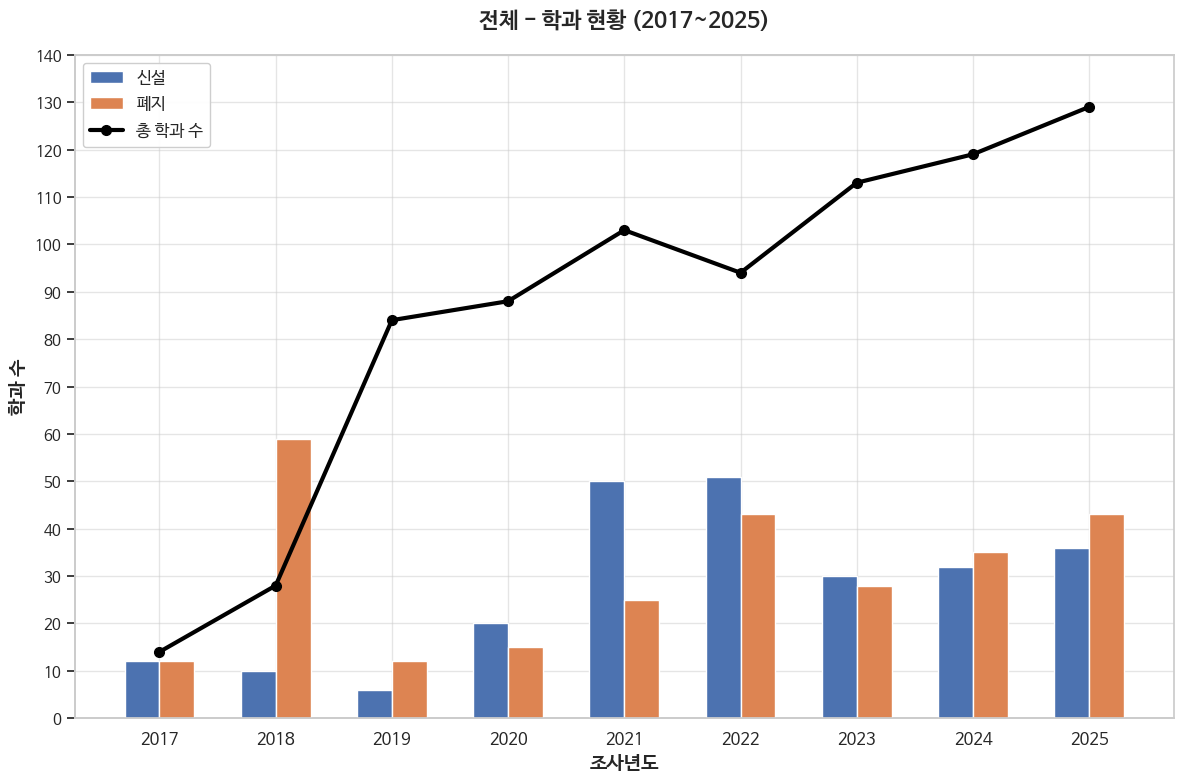

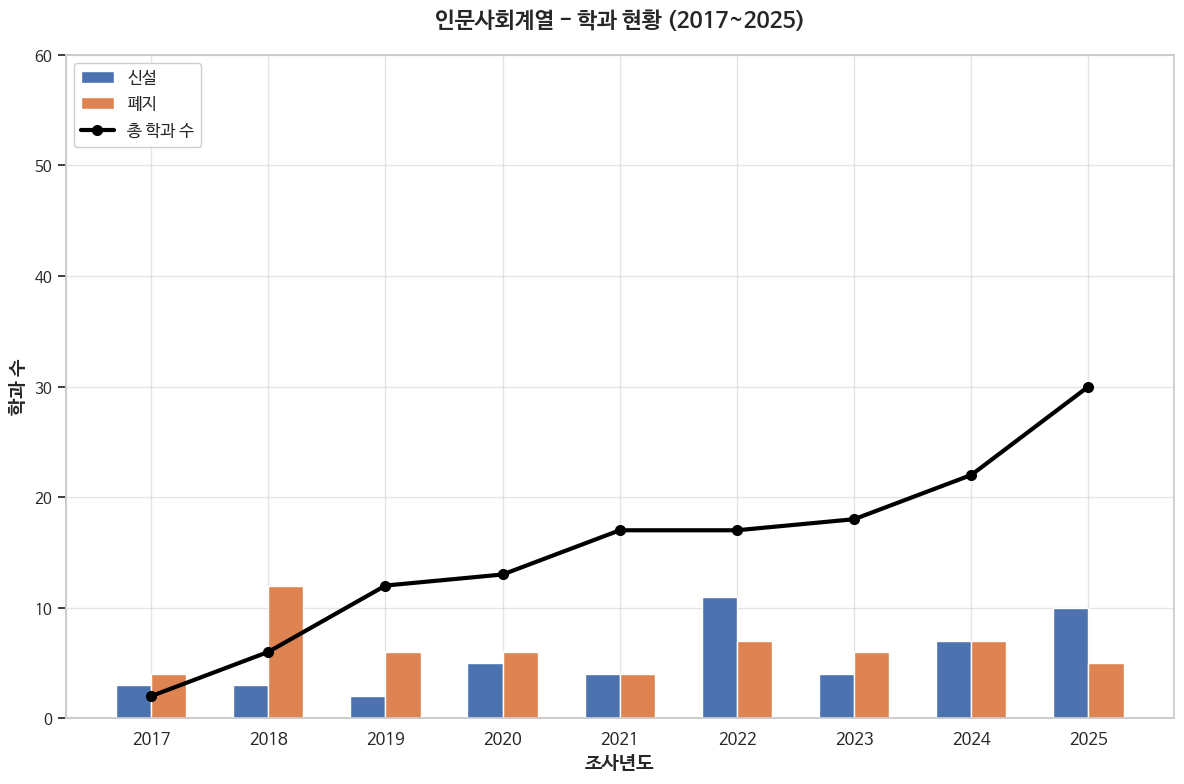

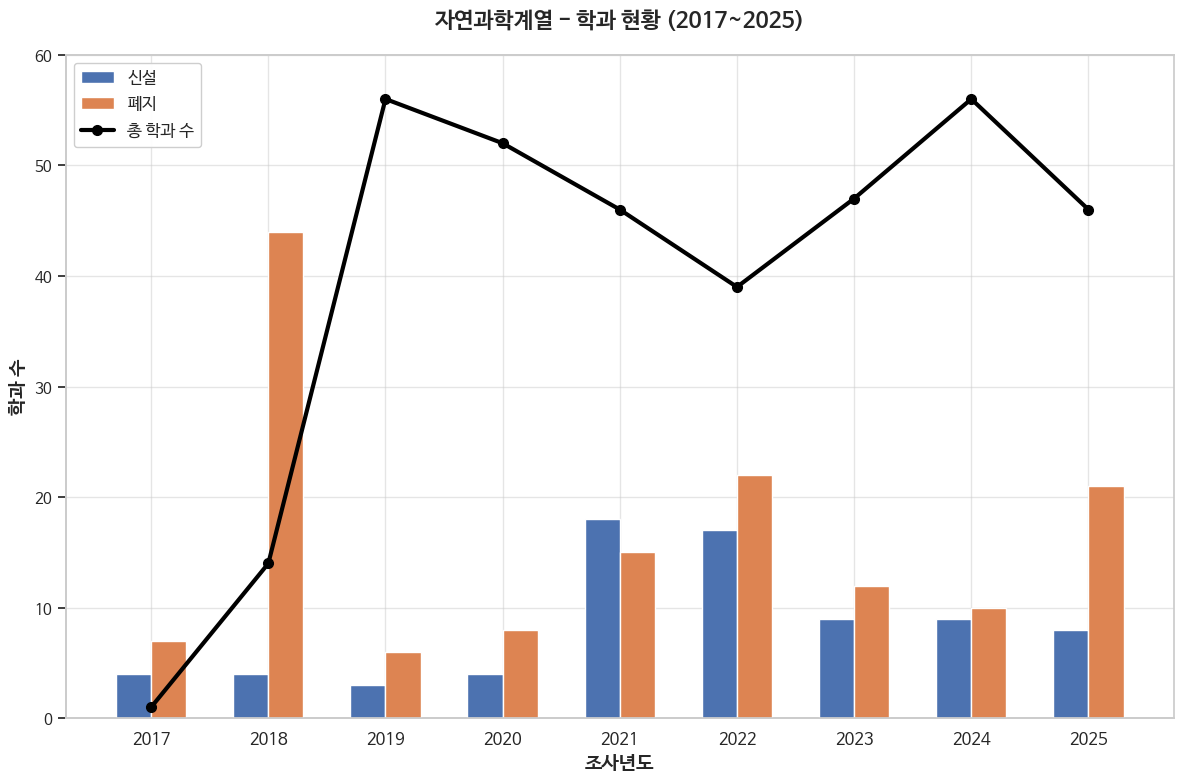

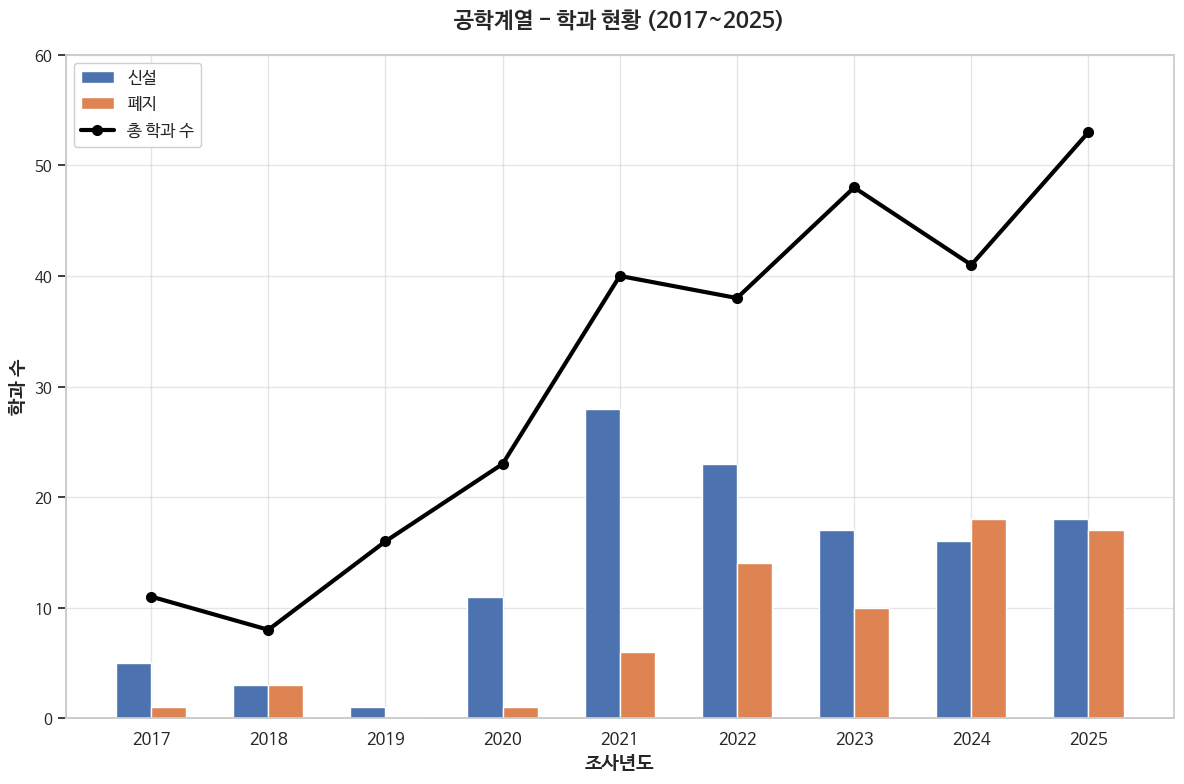

In [ ]:
# 선/막대 그래프

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) 데이터 불러오기
final = pd.read_csv('summary_major.csv', encoding='utf-8', sep=',',
                    header=0, index_col=None, skiprows=None, nrows=None)

sns.set(style="whitegrid", font="NanumBarunGothic")

tracks = ['전체', '인문사회계열', '자연과학계열', '공학계열']

for track in tracks:
    data = final[final['표준분류대계열'] == track].sort_values('조사년도')

    # 하단 막대 + 상단 선 그래프
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid(True, alpha = 0.5)

    # 막대그래프 (신설/폐지) - 하단
    x_pos = np.arange(len(data))
    width = 0.3

    ax.bar(x_pos - width/2, data['신설'], width,
           label='신설', alpha = 1.0, zorder=3)
    ax.bar(x_pos + width/2, data['폐지'], width,
           label='폐지', alpha = 1.0, zorder=3)

    # 선그래프
    ax2 = ax.twinx()
    ax2.plot(x_pos, data['총학과수'],
             marker='o', linewidth=3, markersize=7,
             color='black', label='총 학과 수', zorder=5)

    # Y축 수정: '학과 수' 통일
    ax.set_ylabel('학과 수', fontsize=14, fontweight='bold')
    ax2.yaxis.set_ticks([])  # 오른쪽 Y축 눈금 완전 제거
    ax2.spines['right'].set_visible(False)  # 오른쪽 축선도 제거

    ax.set_xlabel('조사년도', fontsize=14, fontweight='bold')

    # Y축 범위/간격 정확 설정
    if track == '전체':
        max_y = 140
    else:
        max_y = 60

    # 왼쪽 Y축: 숫자만 표시 (격자선 없음)
    ax.set_ylim(0, max_y)
    ax.set_yticks(np.arange(0, max_y + 1, 10))  # 숫자 위치
    ax.tick_params(axis='y', which='minor', left=False, right=False)  # 마이너 틱 제거

    # 오른쪽 Y축도 동일 범위 (숨겨져서 보이지 않음)
    ax2.set_ylim(0, max_y)

    # X축
    ax.set_xticks(x_pos)
    ax.set_xticklabels(data['조사년도'].astype(int), fontsize=12, rotation=0)

    # 제목
    plt.title(f'{track} - 학과 현황 (2017~2025)',
              fontsize=16, fontweight='bold', pad=20)

    # 범례
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2,
              loc='upper left', fontsize=12, framealpha=0.95)

    plt.tight_layout()

    # PNG 저장
    fname = f'학과현황_{track}.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

#**2. 계열별 강의 개수 시계열 분석**

In [ ]:
# CSV 로드
curriculum = pd.read_csv('교육과정_대학_2022~2025.csv', encoding = 'utf-8', sep = ',',
                 header=0, index_col = None, skiprows = None, nrows = None)

# 필요한 열만 사용 (조사년도, 표준분류대계열)
curriculum = curriculum[['조사년도', '표준분류대계열', '교육과정']]

In [ ]:
def plot_curriculum_count_all_groups(curriculum, major_groups, save_dir='major_plots'):

    plt.figure(figsize=(10, 6))

    # 색상 매핑 정의
    color_map = {
        '자연과학계열': 'red',
        '공학계열': 'green',
        '인문사회계열': 'blue'
    }

    # 정렬된 순서대로 처리
    sorted_groups = ['자연과학계열', '공학계열', '인문사회계열']

    for major_group_name in sorted_groups:
        color = color_map[major_group_name]

        # 특정 표준분류대계열만 필터
        sub_curri = curriculum[curriculum['표준분류대계열'] == major_group_name].copy()

        # 교육과정이 비어 있으면 제거
        sub_curri = sub_curri[sub_curri['교육과정'].notna()]

        # 연도별 서로 다른 교육과정 개수 집계
        counts = (
            sub_curri.groupby('조사년도')['교육과정']
                     .nunique()
                     .reset_index(name='curriculum_count')
                     .sort_values('조사년도')
        )

        # 선 하나씩 추가
        plt.plot(
            counts['조사년도'],
            counts['curriculum_count'],
            marker='o',
            color=color,
            label=major_group_name,
            linewidth=2.5
        )

    years = [2022, 2023, 2024, 2025]
    plt.xticks(years)

    plt.title("연도별 계열별 교육과정 개수", fontsize=14, fontweight='bold')
    plt.xlabel("조사년도", fontsize=12)
    plt.ylabel("교육과정 개수", fontsize=12)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)

    # PNG 저장
    filename = f"교육과정_계열별_비교.png"
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

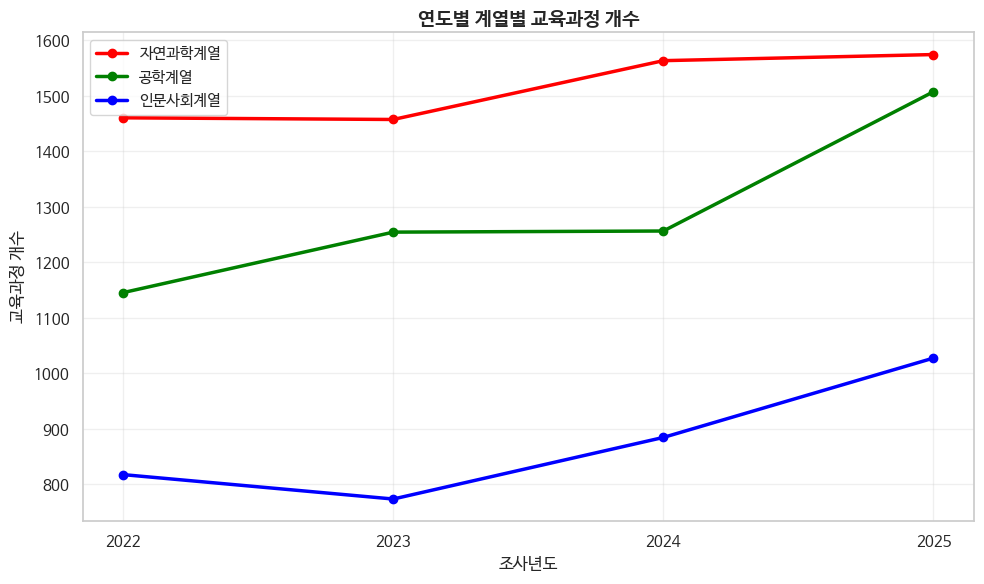

In [ ]:
major_groups = ['인문사회계열', '자연과학계열', '공학계열']
plot_curriculum_count_all_groups(curriculum, major_groups)

# **3. 계열별 교과목해설 텍스트 분석 - 빈도표**



In [ ]:
# 1. Mecab 설치

import subprocess
import os

!pip install mecab-python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 13.4 MB/s eta 0:00:00


In [ ]:
import MeCab

# MeCab 초기화
mecab = MeCab.Tagger()

In [ ]:
# 2. 필요한 라이브러리 로드

import pandas as pd
import re
from collections import Counter

# 불용어 파일 읽기
with open('stopwords_univ.txt', 'r', encoding='utf-8') as f:
    stopwords = set(line.strip() for line in f)

In [ ]:
# 3. 데이터 불러오기

df = pd.read_csv('교육과정_대학_2022~2025.csv', encoding = 'utf-8', sep = ',',
                 header=0, index_col = None, skiprows = None, nrows = None)

# 필요한 컬럼 확인
print("데이터셋 컬럼:", df.columns.tolist())
print(f"전체 행 수: {len(df)}")

# [교과목해설] 컬럼 확인
print(f"\n[교과목해설] 컬럼 내 NaN 개수: {df['교과목해설'].isna().sum()}")

# NaN 값을 빈 문자열로 변환
df['교과목해설'] = df['교과목해설'].fillna('')

데이터셋 컬럼: ['조사년도', '조사차수', '학교코드', '학교명', '본분교명', '학교구분', '단과대학코드', '단과대학명', '표준분류대계열', '학과코드', '학과명', '주야구분명', '학부특성명', '학과상태', '교육과정', '이수구분', '학점', '교과목해설']
전체 행 수: 24601

[교과목해설] 컬럼 내 NaN 개수: 10439


In [ ]:
#. 4. 텍스트 정제
def clean_text(text):
    """
    텍스트 정제 함수
    """
    # 영어 소문자로 통일
    text = str(text).lower()
    # 특수문자 제거 (한글, 영문, 숫자만 유지)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    # 여러 공백을 하나로 통일
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# 5. 명사 추출 및 빈도수 계산

def extract_keywords(texts, stopwords_set, top_n=50):
    """
    텍스트 리스트에서 명사 추출 및 빈도수 계산
    """
    all_nouns = []

    for text in texts:
        if pd.isna(text) or text == '':
            continue

        # 텍스트 정제
        cleaned_text = clean_text(text)

        # MeCab으로 토큰화
        parsed = mecab.parse(cleaned_text)

        # 결과를 라인별로 분리
        lines = parsed.strip().split('\n')

        for line in lines:
            if line == 'EOS':  # 문장 끝 마커
                continue

            parts = line.split('\t')
            if len(parts) < 2:
                continue

            word = parts[0]
            # 품사 정보 파싱 (예: NNG,명사,T,인물,명사,*,*,*,*)
            pos_info = parts[1].split(',')
            pos = pos_info[0]  # 첫 번째가 대분류 품사

            # 명사만 추출 (NNG, NNP, NNB, NNBC)
            if (pos in ['NNG', 'NNP', 'NNB', 'NNBC']
                and word not in stopwords_set
                and len(word) > 1):  # 한 글자 제외
                all_nouns.append(word)

    # 빈도수 계산
    noun_freq = Counter(all_nouns)
    top_keywords = noun_freq.most_common(top_n)

    return top_keywords

In [ ]:
# 5. 계열별로 키워드 추출

# 계열별 분류
categories = {
    '전체': df['교과목해설'].tolist(),
    '인문사회계열': df[df['표준분류대계열'] == '인문사회계열']['교과목해설'].tolist(),
    '자연과학계열': df[df['표준분류대계열'] == '자연과학계열']['교과목해설'].tolist(),
    '공학계열': df[df['표준분류대계열'] == '공학계열']['교과목해설'].tolist()
}

# 각 계열별로 키워드 추출
results = {}
for category_name, texts in categories.items():
    print(f"\n {category_name} 처리 중...")
    keywords = extract_keywords(texts, stopwords, top_n=50)
    results[category_name] = keywords
    print(f" {category_name}: {len(keywords)}개 키워드 추출 완료")


 전체 처리 중...
 전체: 50개 키워드 추출 완료

 인문사회계열 처리 중...
 인문사회계열: 50개 키워드 추출 완료

 자연과학계열 처리 중...
 자연과학계열: 50개 키워드 추출 완료

 공학계열 처리 중...
 공학계열: 50개 키워드 추출 완료


In [ ]:
# 6. 키워드 빈도수 추출

for category_name, keywords in results.items():
    print(f"\n{'='*60}")
    print(f"【 {category_name} 】상위 50개 키워드 빈도수")
    print(f"{'='*60}")

    # DataFrame 생성
    keyword_df = pd.DataFrame(keywords, columns=['키워드', '빈도수'])
    keyword_df['순위'] = range(1, len(keyword_df) + 1)
    keyword_df = keyword_df[['순위', '키워드', '빈도수']]

    # 테이블 출력
    print(keyword_df.to_string(index=False))


【 전체 】상위 50개 키워드 빈도수
 순위    키워드  빈도수
  1     기술 2676
  2     실습 2071
  3  프로그래밍 1912
  4    시스템 1902
  5     수학 1692
  6     설계 1676
  7    컴퓨터 1634
  8     개발 1495
  9     확률 1244
 10     기업 1242
 11     러닝 1236
 12     과학 1225
 13   프로그램 1197
 14     연구 1161
 15   알고리즘 1113
 16     사회 1112
 17     실무 1080
 18 데이터베이스 1034
 19     함수 1033
 20     선형 1030
 21   인공지능 1003
 22     분포 1001
 23  소프트웨어  989
 24     경영  969
 25   프로젝트  948
 26     실험  772
 27     금융  724
 28     경제  704
 29   회귀분석  680
 30     회귀  678
 31     변수  656
 32     공학  654
 33    파이썬  654
 34    마케팅  652
 35   비즈니스  649
 36     기계  649
 37     행렬  648
 38    마이닝  644
 39     머신  633
 40     수리  617
 41    서비스  591
 42     효율  580
 43    시각화  570
 44    방정식  566
 45     변량  536
 46    패키지  534
 47     보험  528
 48     핵심  513
 49     추론  512
 50     특성  503

【 인문사회계열 】상위 50개 키워드 빈도수
 순위   키워드  빈도수
  1    기업  569
  2    경제  539
  3    경영  533
  4    기술  481
  5   마케팅  469
  6    사회  357
  7    실습  342
  8    실무  337
 

In [ ]:
# 7. csv 파일로 저장

for category_name, keywords in results.items():
    keyword_df = pd.DataFrame(keywords, columns=['키워드', '빈도수'])
    keyword_df['순위'] = range(1, len(keyword_df) + 1)
    keyword_df = keyword_df[['순위', '키워드', '빈도수']]

    # 파일명 생성
    filename = f'keyword_frequency_{category_name}.csv'
    keyword_df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"저장 완료: {filename}")

저장 완료: keyword_frequency_전체.csv
저장 완료: keyword_frequency_인문사회계열.csv
저장 완료: keyword_frequency_자연과학계열.csv
저장 완료: keyword_frequency_공학계열.csv


# **4. 계열별 교과목해설 텍스트 분석 - 워드클라우드**



In [ ]:
# 1. 라이브러리 설치

!pip install wordcloud
!pip install matplotlib

In [ ]:
# 2. 라이브러리 import

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm


plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
csv_files = {
    '전체': 'keyword_frequency_전체.csv',
    '인문사회계열': 'keyword_frequency_인문사회계열.csv',
    '자연과학계열': 'keyword_frequency_자연과학계열.csv',
    '공학계열': 'keyword_frequency_공학계열.csv'
}

data = {}
for category, filename in csv_files.items():
    df = pd.read_csv(filename, encoding='utf-8')
    # 키워드와 빈도수를 딕셔너리로 변환
    data[category] = dict(zip(df['키워드'], df['빈도수']))

In [ ]:
color_schemes = {
    '전체': 'managua',
    '인문사회계열': 'Blues',
    '자연과학계열': 'OrRd',
    '공학계열': 'viridis'
}

In [ ]:
categories = list(data.keys())

for category in categories:
    wordcloud = WordCloud(
        width=1000,
        height=1000,
        font_path='/usr/share/fonts/nanum/NanumBarunGothic.ttf',
        background_color='white',
        colormap=color_schemes[category],
        relative_scaling=0.5,
        min_font_size=10,
        max_words=100
    ).generate_from_frequencies(data[category])

    # 워드클라우드를 이미지로 변환
    image = wordcloud.to_image()

    # matplotlib으로 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(f'{category}',
             fontsize=20, fontweight='bold', pad=20)
    plt.axis('off')

    # 개별 파일로 저장
    filename = f'wordcloud_{category}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"저장 완료: {filename}")
    plt.close()

print("\n 모든 워드클라우드 생성 완료!")

저장 완료: wordcloud_전체.png
저장 완료: wordcloud_인문사회계열.png
저장 완료: wordcloud_자연과학계열.png
저장 완료: wordcloud_공학계열.png

 모든 워드클라우드 생성 완료!


# **5. 계열별 프로그래밍 언어 사용 빈도 분석**


In [ ]:
# 1. 라이브러리 및 데이터 로드

import pandas as pd
import re
from collections import Counter

df = pd.read_csv('교육과정_대학_2022~2025.csv', encoding = 'utf-8', sep = ',',
                 header=0, index_col = None, skiprows = None, nrows = None)
df['교과목해설'] = df['교과목해설'].fillna('')

In [ ]:
# 2. 프로그래밍 언어 동의어 정의


programming_languages = {
    'Python': ['python', 'Python', 'PYTHON', '파이썬'],
    'R': ['\\br\\b', '\\bR\\b', 'r언어', 'R언어', 'r 언어', 'R 언어'],
    'Java': ['Java', 'Javascript', 'java', 'javascript', '자바', 'JAVA'],
    'SQL': ['SQL', 'sql', 'Sql'],
    'C': ['C\\+\\+', 'C#', 'C언어', '\\bC\\b', 'c\\+\\+', 'c#']
}

In [ ]:
# 3. 프로그래밍 언어 감지 함수

def count_programming_languages(text, languages_dict):
    """
    텍스트에서 프로그래밍 언어 찾기
    """
    counts = {lang: 0 for lang in languages_dict.keys()}

    for lang, patterns in languages_dict.items():
        for pattern in patterns:
            # 대소문자 무시하고 찾기
            matches = re.findall(pattern, text, re.IGNORECASE)
            counts[lang] += len(matches)

    return counts

In [ ]:
# 4. 각 계열별로 프로그래밍 언어 빈도 계산

categories = {
    '전체': df['교과목해설'].tolist(),
    '자연과학계열': df[df['표준분류대계열'] == '자연과학계열']['교과목해설'].tolist(),
    '공학계열': df[df['표준분류대계열'] == '공학계열']['교과목해설'].tolist(),
    '인문사회계열': df[df['표준분류대계열'] == '인문사회계열']['교과목해설'].tolist()
}

results = {}

for category_name, texts in categories.items():
    # 카테고리별 프로그래밍 언어 합계
    total_counts = {lang: 0 for lang in programming_languages.keys()}

    for text in texts:
        lang_counts = count_programming_languages(text, programming_languages)
        for lang, count in lang_counts.items():
            total_counts[lang] += count

    results[category_name] = total_counts

In [ ]:
# 5. 결과 출력

print("=" * 70)
print("프로그래밍 언어 빈도 분석")
print("=" * 70)

for category_name, counts in results.items():
    print(f"\n【{category_name}】")
    print("-" * 50)

    # DataFrame으로 변환
    lang_df = pd.DataFrame(
        list(counts.items()),
        columns=['프로그래밍 언어', '빈도수']
    ).sort_values('빈도수', ascending=False)

    print(lang_df.to_string(index=False))
    print()

프로그래밍 언어 빈도 분석

【전체】
--------------------------------------------------
프로그래밍 언어  빈도수
  Python 1704
       R  930
     SQL  900
    Java  565
       C  380


【자연과학계열】
--------------------------------------------------
프로그래밍 언어  빈도수
  Python  617
       R  384
     SQL  264
    Java  107
       C   83


【공학계열】
--------------------------------------------------
프로그래밍 언어  빈도수
  Python  650
     SQL  492
    Java  374
       R  242
       C  179


【인문사회계열】
--------------------------------------------------
프로그래밍 언어  빈도수
  Python  437
       R  304
     SQL  144
       C  118
    Java   84



In [ ]:
# 6. CSV로 저장

# 각 계열별 개별 CSV 저장
for category_name, counts in results.items():
    lang_df = pd.DataFrame(
        list(counts.items()),
        columns=['프로그래밍 언어', '빈도수']
    ).sort_values('빈도수', ascending=False)

    filename = f'programming_language_frequency_{category_name}.csv'
    lang_df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"저장 완료: {filename}")

# 전체 비교 테이블 (모든 계열 한눈에 보기)
comparison_df = pd.DataFrame(results).fillna(0).astype(int)
comparison_df.to_csv('programming_language_comparison_all.csv', encoding='utf-8-sig')
print(f"저장 완료: programming_language_comparison_all.csv")

✅ 저장 완료: programming_language_frequency_전체.csv
✅ 저장 완료: programming_language_frequency_자연과학계열.csv
✅ 저장 완료: programming_language_frequency_공학계열.csv
✅ 저장 완료: programming_language_frequency_인문사회계열.csv
✅ 저장 완료: programming_language_comparison_all.csv

🎉 분석 완료!
